<a href="https://colab.research.google.com/github/KOUSIKROY101/Kaggle_Titanic/blob/master/TITANIC_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First importing all the necessery packages and loading the data

In [0]:
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
sns.set()


train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


# visualizing the training data

In [0]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# visualizing the test data

In [0]:
test.head(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [0]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Insight:
 Null values are present in **Age** , **Cabin** and **Embarked** features.

In [0]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Bar chart for categorical features

In [0]:
def bar_chart(feature):
 survived=train[train['Survived']==1][feature].value_counts()
 dead=train[train['Survived']==0][feature].value_counts()
 df=pd.DataFrame([survived,dead])
 df.index=["Survived","Dead"]
 df.plot(kind='bar',stacked=False,figsize=(10,5))

#visualizing different features with bar chart

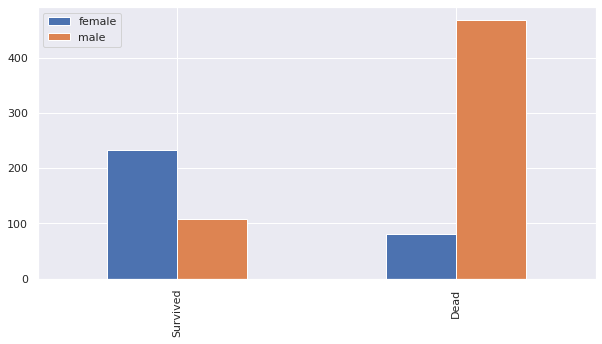

In [0]:
bar_chart("Sex")

#Insight:
Here we see **Women** are more likely to survive than **Men**

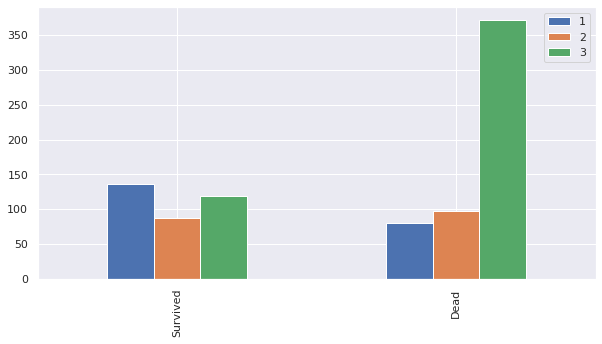

In [0]:
bar_chart("Pclass")

#Insight:
**Class 1** (Rich) are most likely to survive.
**Class 2** have almost equal chance of surviving or being dead.
**Class 3** are the most unlucky ones.

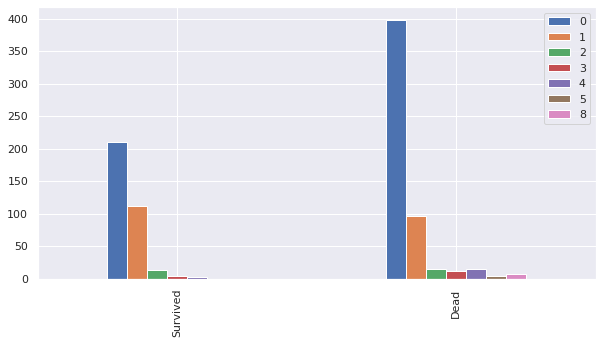

In [0]:
bar_chart("SibSp")

#Insights:
Having more siblings or spouse tends to being dead.

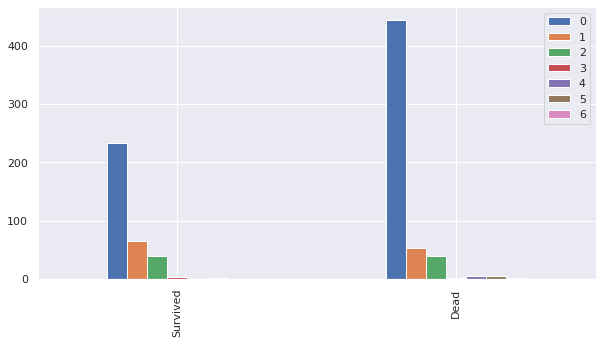

In [0]:
bar_chart("Parch")

#Insights:
Having parents or children tends to being dead.

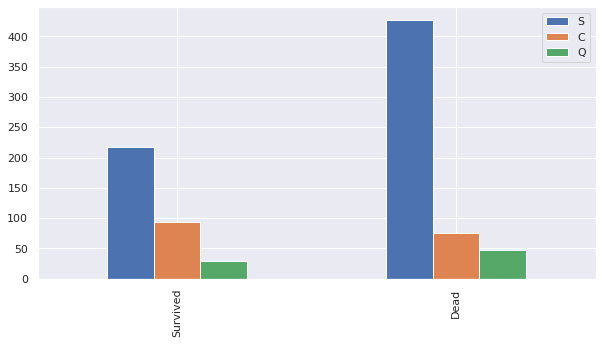

In [0]:
bar_chart("Embarked")

#Insights:
**C class** has higher chance of surviving.

#Feature Engineering:
To handle missing value and feature exploration

In [0]:
Image(url="http://aoife.dbsdataprojects.com/wp-content/uploads/sites/127/2016/06/TItanic-Survival-Infographic-825x510.jpg")

#Name Feature:
The name feature has little importance however we can extract some information from it.

In [0]:
train_test_data=[train,test]

for data in train_test_data:
  data["Title"]=data["Name"].str.extract('([a-zA-Z]+)\.',expand=False)
  

In [0]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Don           1
Jonkheer      1
Capt          1
Lady          1
Ms            1
Sir           1
Countess      1
Name: Title, dtype: int64

In [0]:
test["Title"].value_counts()


Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

#Encoding Mr,Miss and Mrs and others:

In [0]:

train['Title'].replace({'Mr':'0','Miss':'1','Mrs':'2'},inplace=True)
test['Title'].replace({'Mr':'0','Miss':'1','Mrs':'2'},inplace=True)



In [0]:

for data in train_test_data:
  data["Title"]=data["Title"].str.replace('([a-zA-Z]+)','3')
  

In [0]:
train['Title']=train['Title'].astype('int')#object to int type conversion

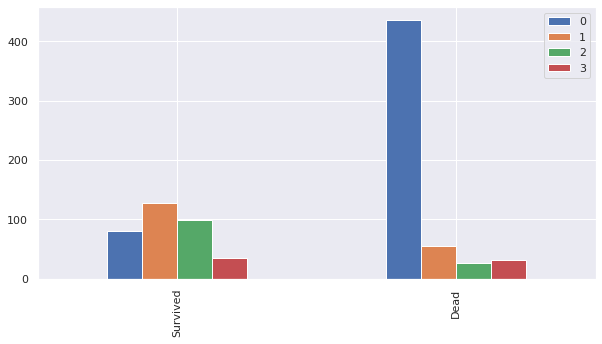

In [0]:
bar_chart('Title')

#Insights:
**Mr** titled people mostly died, **Miss** and **Mrs** titled people mostly survived and 50-50 chance almost for **others**.

#Dropping Name Feature

In [0]:
train.drop('Name',axis=1,inplace=True)


In [0]:
test.drop('Name',axis=1,inplace=True)


# SEX Feature

In [0]:
sex_mapping={'male':0,'female':10}
for data in train_test_data:
  data['Sex']=data['Sex'].map(sex_mapping)

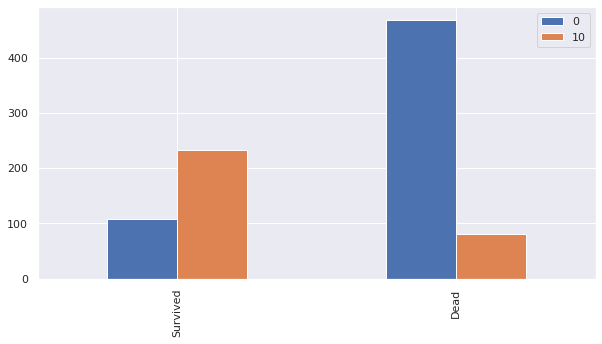

In [0]:
bar_chart('Sex')

#Age
Filling missing values.

In [0]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)



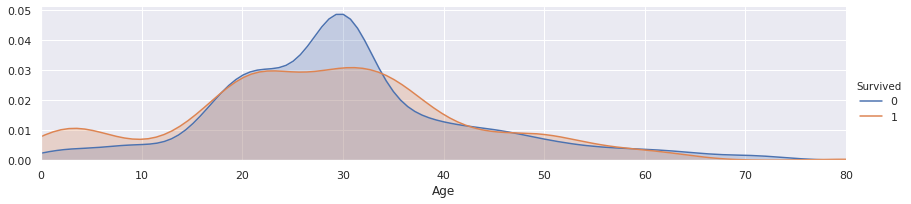

In [0]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
#plt.xlim(0,60)
plt.show()

#Insight:
According to the plots with varying the xlim we do binning on Age feature to separate it in 5 groups. 

Child:0

Young:1

Adult:2

Senior:3

Old:4

In [0]:
for data in train_test_data:
  data.loc[data['Age']<=18,'Age']=0
  data.loc[(data['Age']>18) & (data['Age']<=34),'Age']=1
  data.loc[(data['Age']>34) & (data['Age']<=42),'Age']=2
  data.loc[(data['Age']>42) & (data['Age']<=58),'Age']=3
  data.loc[data['Age']>58,'Age']=4

In [0]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,10,2.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,10,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,10,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


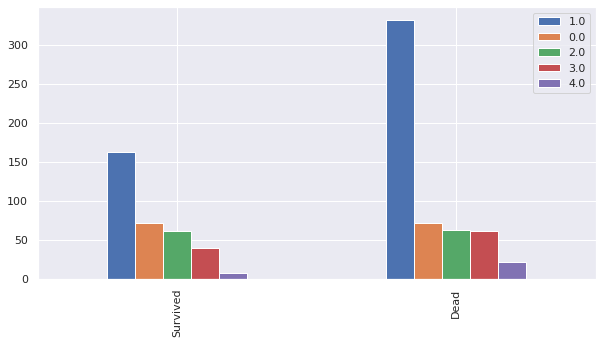

In [0]:
bar_chart("Age")

#Embarked

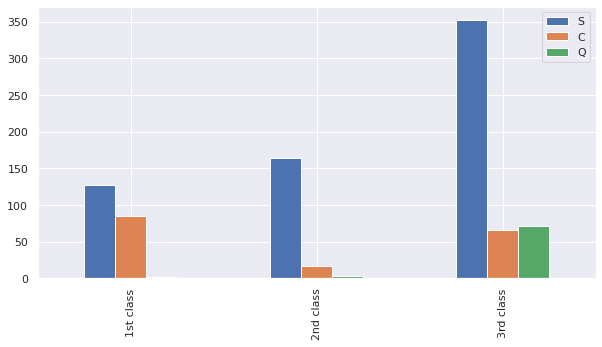

In [0]:
Pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=False,figsize=(10,5))

#Insights:
Most of embarked feature is S so we can fill out the few missing values with S.

In [0]:
for data in train_test_data:
  data['Embarked']=data['Embarked'].fillna('S')

So now only feature Cabin has null values and 1 missing vale in Fare in test set.

#Mapping to numeric for feature Embarked:

In [0]:
Embarked_mapping={'S':0,'C':1,'Q':2}
for data in train_test_data:
  data['Embarked']=data['Embarked'].map(Embarked_mapping)

#Fare: 
Filling the missing value with median of fare based on Pclass.

In [0]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)

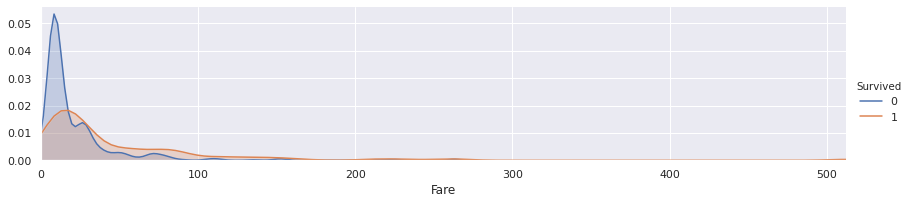

In [0]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
#plt.xlim(100,300)
plt.show()

#Insights:
People with higher ticket price were more likely to survive.


#Binning for Fare:
From above plot we can seperate Fare in 4 groups such as:

<=17 : 0

\>17 & <=28 : 1

\>28 & <=150 : 2

\>150 : 3



In [0]:
for data in train_test_data:
  data.loc[data['Fare']<=17,'Fare']=0
  data.loc[(data['Fare']>17) & (data['Fare']<=28),'Fare']=1
  data.loc[(data['Fare']>28) & (data['Fare']<=150),'Fare']=2
  data.loc[data['Fare']>150,'Fare']=3

In [0]:
train.head(5)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,10,2.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,10,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,10,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


#Cabin:

In [0]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
D              3
              ..
A20            1
F G63          1
C49            1
C86            1
B41            1
Name: Cabin, Length: 147, dtype: int64

#Insights:
As we see the first character in Cabin is informative so we are going to extract them only.

In [0]:
for data in train_test_data:
  data['Cabin']=data['Cabin'].str[:1]

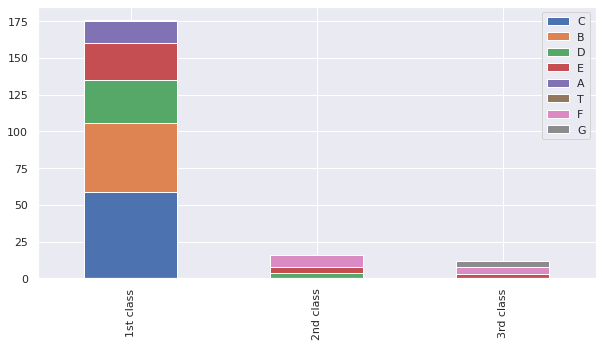

In [0]:
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

#Binning for Cabin:


In [0]:
Cabin_mapping={'A':0,'B':.2,'C':.4,'D':.6,'E':.8,'F':1.0,'G':1.2,'T':1.4}
for data in train_test_data:
  data['Cabin']=data['Cabin'].map(Cabin_mapping)

#Filling Missing values of cabin

In [0]:
train["Cabin"].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test["Cabin"].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

#Creating a new feature called Family Size:

In [0]:
train['Family_size']=train['SibSp']+train['Parch']+1
test['Family_size']=test['SibSp']+test['Parch']+1

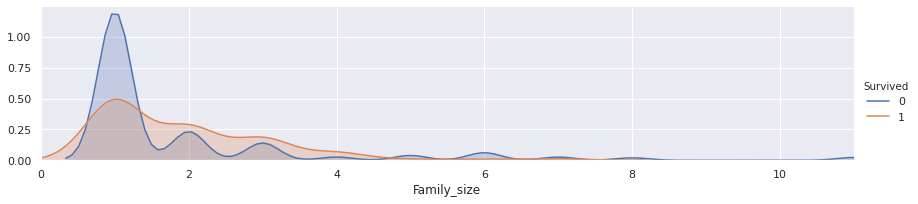

In [0]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Family_size',shade=True)
facet.set(xlim=(0,train['Family_size'].max()))
facet.add_legend()
#plt.xlim(100,300)
plt.show()

#Normalizing Family size

In [0]:
train['Family_size']=(train['Family_size']-train['Family_size'].min())/(train['Family_size'].max()-train['Family_size'].min())
test['Family_size']=(test['Family_size']-test['Family_size'].min())/(test['Family_size'].max()-test['Family_size'].min())

#Dropping feature Ticket as its useless and also Dropping features SibSp and Parch as their information is already covered in Family_size

In [0]:
features_drop=['Ticket','SibSp','Parch']
train=train.drop(features_drop,axis=1)
test=test.drop(features_drop,axis=1)

In [0]:
train=train.drop('PassengerId',axis=1)

#Creating the Feature Matrix and Label Matrix:

In [0]:
train_data=train.drop('Survived',axis=1)

In [0]:
target=train['Survived']

In [0]:
train_data.shape,target.shape

((891, 8), (891,))

In [0]:
train_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_size
0,3,0,1.0,0.0,1.0,0,0,0.1
1,1,10,2.0,2.0,0.4,1,2,0.1
2,3,10,1.0,0.0,1.0,0,1,0.0
3,1,10,2.0,2.0,0.4,0,2,0.1
4,3,0,2.0,0.0,1.0,0,0,0.0
...,...,...,...,...,...,...,...,...
886,2,0,1.0,0.0,0.9,0,3,0.0
887,1,10,1.0,2.0,0.2,0,1,0.0
888,3,10,1.0,1.0,1.0,0,1,0.3
889,1,0,1.0,2.0,0.4,1,0,0.0


#MODELING and Training:

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier


#Setting up the K-Fold CROSS VALIDATION

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,shuffle=True,random_state=0)

#K-NN:

In [0]:
clf=KNeighborsClassifier(n_neighbors=11)
scoring='accuracy'
score=cross_val_score(clf,train_data,target,scoring=scoring,cv=k_fold)
print(score)

[0.81111111 0.85393258 0.84269663 0.84269663 0.84269663 0.83146067
 0.80898876 0.79775281 0.79775281 0.84269663]


#Knn score

In [0]:
round(np.mean(score)*100,2)

82.72

#DECISION TREE:

In [0]:
clf=DecisionTreeClassifier()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,scoring=scoring,cv=k_fold)
print(score)

[0.8        0.82022472 0.75280899 0.79775281 0.84269663 0.80898876
 0.82022472 0.78651685 0.74157303 0.82022472]


#Decision tree score

In [0]:
round(np.mean(score)*100,2)

79.91

#RANDOM FOREST:

In [0]:
clf=RandomForestClassifier(n_estimators=15)
scoring='accuracy'
score=cross_val_score(clf,train_data,target,scoring=scoring,cv=k_fold)
print(score)

[0.82222222 0.84269663 0.76404494 0.82022472 0.8988764  0.82022472
 0.80898876 0.78651685 0.75280899 0.84269663]


#Random forest score

In [0]:
round(np.mean(score)*100,2)

81.59

#NAIVE BAYES:

In [0]:
clf=GaussianNB()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,scoring=scoring,cv=k_fold)
print(score)

[0.86666667 0.73033708 0.74157303 0.74157303 0.69662921 0.80898876
 0.76404494 0.79775281 0.86516854 0.82022472]


#Naive bayes score

In [0]:
round(np.mean(score)*100,2)

78.33

#SVM:

In [0]:
clf=SVC()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,scoring=scoring,cv=k_fold)
print(score)

[0.81111111 0.78651685 0.79775281 0.76404494 0.79775281 0.78651685
 0.78651685 0.82022472 0.82022472 0.82022472]


#Svm score

In [0]:
round(np.mean(score)*100,2)

79.91

#Final classifier and test:

In [0]:
clf1=KNeighborsClassifier(n_neighbors=11)
clf2=DecisionTreeClassifier()
clf3=RandomForestClassifier(n_estimators=15)
clf4=GaussianNB()
clf5=SVC()
clf=VotingClassifier(estimators=[('knn',clf1),('dt',clf2),('rf',clf3),('gnb',clf4),('svm',clf5)])
clf.fit(train_data,target)
clf1.fit(train_data,target)
clf2.fit(train_data,target)
clf3.fit(train_data,target)
clf4.fit(train_data,target)
clf5.fit(train_data,target)
test_data=test.drop('PassengerId',axis=1).copy()
prediction=clf.predict(test_data)
prediction1=clf1.predict(test_data)
prediction2=clf2.predict(test_data)
prediction3=clf3.predict(test_data)
prediction4=clf4.predict(test_data)
prediction5=clf5.predict(test_data)

#Submission file creation:


In [0]:
submission=pd.DataFrame({'PassengerId':test['PassengerId'],
                         'Survived':prediction})
submission.to_csv('submission.csv',index=False)


In [0]:
submission1=pd.DataFrame({'PassengerId':test['PassengerId'],
                         'Survived':prediction})
submission1.to_csv('submissionknn.csv',index=False)

In [0]:
submission2=pd.DataFrame({'PassengerId':test['PassengerId'],
                         'Survived':prediction})
submission2.to_csv('submissiondt.csv',index=False)

In [0]:
submission3=pd.DataFrame({'PassengerId':test['PassengerId'],
                         'Survived':prediction})
submission3.to_csv('submissionrf.csv',index=False)

In [0]:
submission4=pd.DataFrame({'PassengerId':test['PassengerId'],
                         'Survived':prediction})
submission4.to_csv('submissiongnb.csv',index=False)

In [0]:
submission5=pd.DataFrame({'PassengerId':test['PassengerId'],
                         'Survived':prediction})
submission5.to_csv('submissionsvm.csv',index=False)

In [0]:
sub=pd.read_csv('submission.csv')
sub.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [0]:
sub=pd.read_csv('submissionsvm.csv')
sub.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [0]:
sub=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':0})
idx=np.arange(0,418)
for i in idx:
  if test.iloc[i]['Sex']==10:
    sub.iloc[i]['Survived']=1

In [0]:
sub.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
sub.to_csv("sub.csv",index=False)